## IMPORTING LIBRARIES

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## DATA PRE-PROCESSING

### Training Image Pre-Processing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\train',
label_mode="categorical",
image_size=(128,128)
) 

Found 70295 files belonging to 38 classes.


### Validation Image Pre-Processing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid',
label_mode="categorical",
image_size=(128,128)
)

Found 17572 files belonging to 38 classes.


In [5]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[120.5  105.5  110.5 ]
   [118.25 103.25 108.25]
   [107.75  92.75  97.75]
   ...
   [116.   103.   110.  ]
   [115.5  102.5  109.5 ]
   [126.   113.   120.  ]]

  [[118.25 103.25 108.25]
   [116.5  101.5  106.5 ]
   [126.   111.   116.  ]
   ...
   [121.5  108.5  115.5 ]
   [117.75 104.75 111.75]
   [117.25 104.25 111.25]]

  [[116.5  101.5  106.5 ]
   [106.5   91.5   96.5 ]
   [110.75  95.75 100.75]
   ...
   [126.25 113.25 120.25]
   [123.5  110.5  117.5 ]
   [127.25 114.25 121.25]]

  ...

  [[171.5  160.5  164.5 ]
   [176.   165.   169.  ]
   [172.75 161.75 165.75]
   ...
   [163.25 156.25 164.25]
   [159.25 152.25 160.25]
   [160.25 153.25 161.25]]

  [[173.25 162.25 166.25]
   [177.25 166.25 170.25]
   [173.   162.   166.  ]
   ...
   [165.   158.   166.  ]
   [160.5  153.5  161.5 ]
   [160.75 153.75 161.75]]

  [[175.5  164.5  168.5 ]
   [177.   166.   170.  ]
   [174.25 163.25 167.25]
   ...
   [170.5  163.5  171.5 ]
   [167.25 160.25 168.25]
   [161.5  154.5  16

In [6]:
for x,y in validation_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[101.    92.   113.  ]
   [114.5  105.5  126.5 ]
   [112.25 103.25 124.25]
   ...
   [109.    95.   112.  ]
   [ 84.75  70.75  87.75]
   [122.5  108.5  125.5 ]]

  [[100.    91.   112.  ]
   [125.75 116.75 137.75]
   [102.    93.   114.  ]
   ...
   [ 88.5   74.5   91.5 ]
   [111.25  97.25 114.25]
   [114.25 100.25 117.25]]

  [[112.75 103.75 124.75]
   [128.5  119.5  140.5 ]
   [112.   103.   124.  ]
   ...
   [ 95.75  81.75  98.75]
   [ 91.25  77.25  94.25]
   [ 85.75  71.75  88.75]]

  ...

  [[191.25 195.25 207.25]
   [184.5  188.5  200.5 ]
   [192.75 196.75 208.75]
   ...
   [159.25 160.25 180.25]
   [155.   156.   176.  ]
   [150.5  151.5  171.5 ]]

  [[195.5  199.5  211.5 ]
   [194.   198.   210.  ]
   [189.   193.   205.  ]
   ...
   [159.   160.   180.  ]
   [158.5  159.5  179.5 ]
   [156.25 157.25 177.25]]

  [[192.25 196.25 208.25]
   [192.25 196.25 208.25]
   [196.   200.   212.  ]
   ...
   [155.25 156.25 176.25]
   [154.75 155.75 175.75]
   [156.25 157.25 17

## GPU SUPPORT

In [7]:
if tf.config.list_physical_devices('GPU'):
    print("OK! GPU is available and ready for use!")
else:
    print("NO! GPU not found. Falling back to CPU.")


OK! GPU is available and ready for use!


## BUILDING MODEL

In [8]:
from tensorflow.keras.layers import Dense , Conv2D , MaxPool2D , Flatten , GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras.models import Sequential

### Building Convolutional Layer

In [9]:
model = Sequential()

In [10]:
model.add(Input(shape=(128, 128, 3)))
model.add(Conv2D(filters=32 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=32 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

model.add(Conv2D(filters=64 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=64 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

model.add(Conv2D(filters=128 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=128 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

model.add(Conv2D(filters=256 , kernel_size=3 , padding='same' , activation='relu'))
model.add(Conv2D(filters=256 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

model.add(Conv2D(filters=512 , kernel_size=3 , padding='same' , activation='relu' ))
model.add(Conv2D(filters=512 , kernel_size=3 , activation='relu'))
model.add(MaxPool2D(pool_size=2 , strides=2))

model.add(GlobalAveragePooling2D())

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units=1500, activation='relu'))

model.add(Dropout(0.35))

model.add(Dense(units=38, activation='softmax'))

### Compiling Model

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001) , loss='categorical_crossentropy' , metrics=['accuracy'])

### Model Summary

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## TRAINING MODEL

In [13]:
training_history = model.fit(x= training_set , validation_data= validation_set , epochs = 7)

Epoch 1/7
2197/2197 [==============================] - 233s 97ms/step - loss: 1.5500 - accuracy: 0.5420 - val_loss: 0.5834 - val_accuracy: 0.8205
Epoch 2/7
2197/2197 [==============================] - 186s 85ms/step - loss: 0.4958 - accuracy: 0.8427 - val_loss: 0.3583 - val_accuracy: 0.8862
Epoch 3/7
2197/2197 [==============================] - 188s 85ms/step - loss: 0.2871 - accuracy: 0.9081 - val_loss: 0.2014 - val_accuracy: 0.9350
Epoch 4/7
2197/2197 [==============================] - 187s 85ms/step - loss: 0.1987 - accuracy: 0.9359 - val_loss: 0.1783 - val_accuracy: 0.9424
Epoch 5/7
2197/2197 [==============================] - 182s 83ms/step - loss: 0.1469 - accuracy: 0.9527 - val_loss: 0.1898 - val_accuracy: 0.9410
Epoch 6/7
2197/2197 [==============================] - 185s 84ms/step - loss: 0.1190 - accuracy: 0.9613 - val_loss: 0.1842 - val_accuracy: 0.9453
Epoch 7/7
2197/2197 [==============================] - 187s 85ms/step - loss: 0.0941 - accuracy: 0.9684 - val_loss: 0.1513 -

## MODEL EVALUATION

In [14]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 56s 25ms/step - loss: 0.0653 - accuracy: 0.9781


In [15]:
print(train_loss)
print(train_acc)

0.06534760445356369
0.9781349897384644


In [16]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 14s 25ms/step - loss: 0.1513 - accuracy: 0.9534


In [17]:
print(val_loss)
print(val_acc)

0.1512623280286789
0.9533917307853699


## SAVE MODEL

In [18]:
model.save("trained_cnn_model.keras")

## TRAINING HISTORY SAVING

In [19]:
training_history.history

{'loss': [1.5499850511550903,
  0.49584290385246277,
  0.28714510798454285,
  0.19866843521595,
  0.1469130665063858,
  0.11900968849658966,
  0.0940849632024765],
 'accuracy': [0.542015790939331,
  0.8427342176437378,
  0.9080873727798462,
  0.9358702898025513,
  0.9527135491371155,
  0.9612774848937988,
  0.9684045910835266],
 'val_loss': [0.5834441781044006,
  0.35834500193595886,
  0.20143984258174896,
  0.17832723259925842,
  0.18983635306358337,
  0.18415987491607666,
  0.15126240253448486],
 'val_accuracy': [0.8204529881477356,
  0.8861825466156006,
  0.9349533319473267,
  0.9423514604568481,
  0.9409856796264648,
  0.9452537894248962,
  0.9533917307853699]}

In [21]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history , f)

## MODEL VISUALIZATION

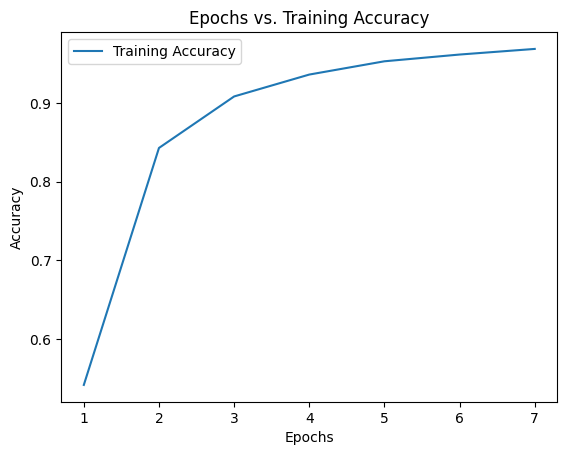

In [23]:
epochs = [i for i in range (1,8)]
plt.plot(epochs, training_history.history['accuracy'] , label='Training Accuracy' )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Epochs vs. Training Accuracy')
plt.savefig('Visualization_images\\Epochs vs. Training Accuracy.JPG')

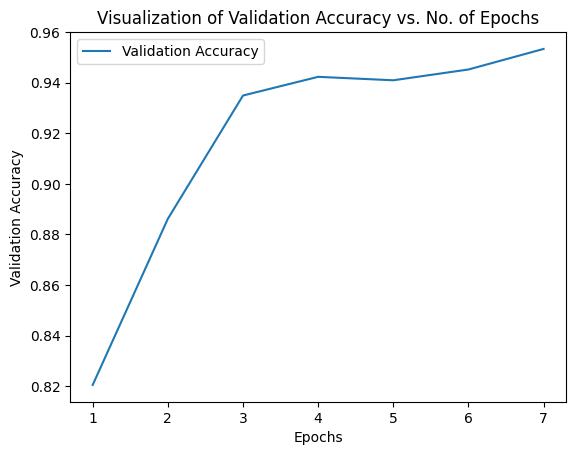

In [24]:
epochs = [i for i in range (1,8)]
plt.plot(epochs, training_history.history['val_accuracy'] , label='Validation Accuracy' )
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Visualization of Validation Accuracy vs. No. of Epochs')
plt.savefig("Visualization_images\\Validation Accuracy vs. No. of Epochs.JPG")

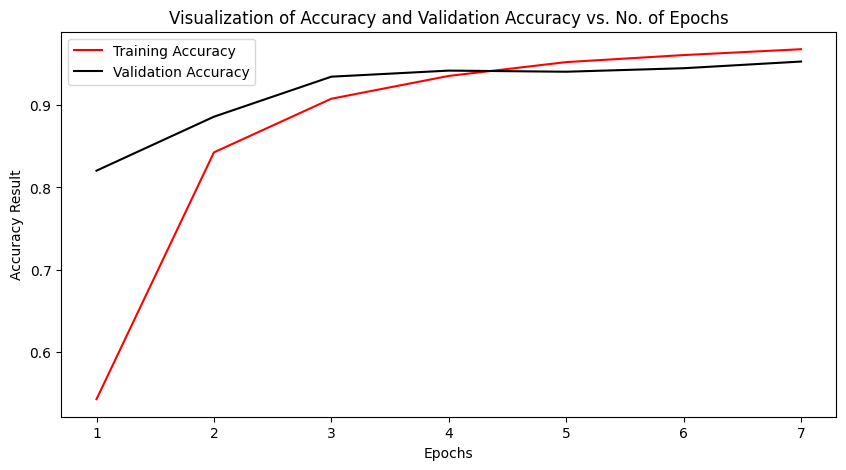

In [25]:
epochs = [i for i in range (1,8)]
plt.figure(figsize=(10,5))
plt.plot(epochs, training_history.history['accuracy'] , color='red', label='Training Accuracy' )
plt.plot(epochs, training_history.history['val_accuracy'] , color='black', label='Validation Accuracy' )
plt.xlabel('Epochs')
plt.ylabel('Accuracy Result')
plt.legend()
plt.title('Visualization of Accuracy and Validation Accuracy vs. No. of Epochs')
plt.savefig("Visualization_images\\Training Accuracy and Validation Accuracy vs. No. of Epochs.JPG")

## MODEL METRICS EVALUATION

In [26]:
class_name = validation_set.class_names

In [27]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [28]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid',
label_mode="categorical",
shuffle=False,
image_size=(128,128)
)

Found 17572 files belonging to 38 classes.


In [29]:
y_pred = model.predict(test_set)


550/550 [==============================] - 13s 23ms/step


In [30]:
y_pred, y_pred.shape


(array([[9.9633336e-01, 3.1806375e-03, 3.7862192e-05, ..., 3.0716496e-09,
         1.0201278e-08, 3.4430286e-07],
        [9.9985850e-01, 7.3454175e-05, 3.1936963e-06, ..., 3.2565790e-11,
         8.4213365e-09, 2.8199731e-08],
        [9.9027151e-01, 7.9439487e-04, 1.5487127e-05, ..., 3.3300121e-10,
         4.2082556e-07, 8.7089093e-06],
        ...,
        [6.7736117e-08, 5.5355165e-09, 7.4876361e-06, ..., 4.4806551e-08,
         6.0110423e-08, 9.9958831e-01],
        [5.8659599e-10, 1.1519073e-11, 3.7152745e-08, ..., 6.2427574e-10,
         7.4732420e-10, 9.9999475e-01],
        [2.1205383e-13, 2.1371380e-16, 5.0234730e-13, ..., 1.2419936e-13,
         2.7329462e-12, 9.9999619e-01]], dtype=float32),
 (17572, 38))

In [31]:
predicted_categories = tf.argmax(y_pred, axis=1)


In [32]:
predicted_categories


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [33]:
true_categories = tf.concat([y for x,y in test_set], axis=0)


In [34]:
true_categories


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [35]:
y_true = tf.argmax(true_categories, axis=1)


In [36]:
y_true


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

## METRICS

In [37]:
from sklearn.metrics import classification_report , confusion_matrix, recall_score, precision_score, f1_score

In [38]:
print(classification_report(y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.85      0.92       504
                                 Apple___Black_rot       0.97      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.95      0.97       440
                                   Apple___healthy       0.94      0.91      0.92       502
                               Blueberry___healthy       0.95      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.98      0.97       421
                 Cherry_(including_sour)___healthy       1.00      0.95      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.93      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.93      0.

In [39]:
print(confusion_matrix(y_true, predicted_categories))

[[430  12   0 ...   0   0   0]
 [  0 486   0 ...   0   0   0]
 [  0   0 418 ...   0   0   0]
 ...
 [  0   0   0 ... 485   1   0]
 [  0   0   0 ...   0 448   0]
 [  0   0   1 ...   0   0 473]]


In [40]:
confusion_matrix(y_true, predicted_categories).shape

(38, 38)

In [41]:
print(precision_score(y_true, predicted_categories, average= 'weighted'))

0.9553324693787202


In [42]:
print(recall_score(y_true, predicted_categories, average='weighted'))

0.9533917596175734


In [43]:
print(f1_score(y_true, predicted_categories, average='weighted'))

0.9532093629462232


<Axes: >

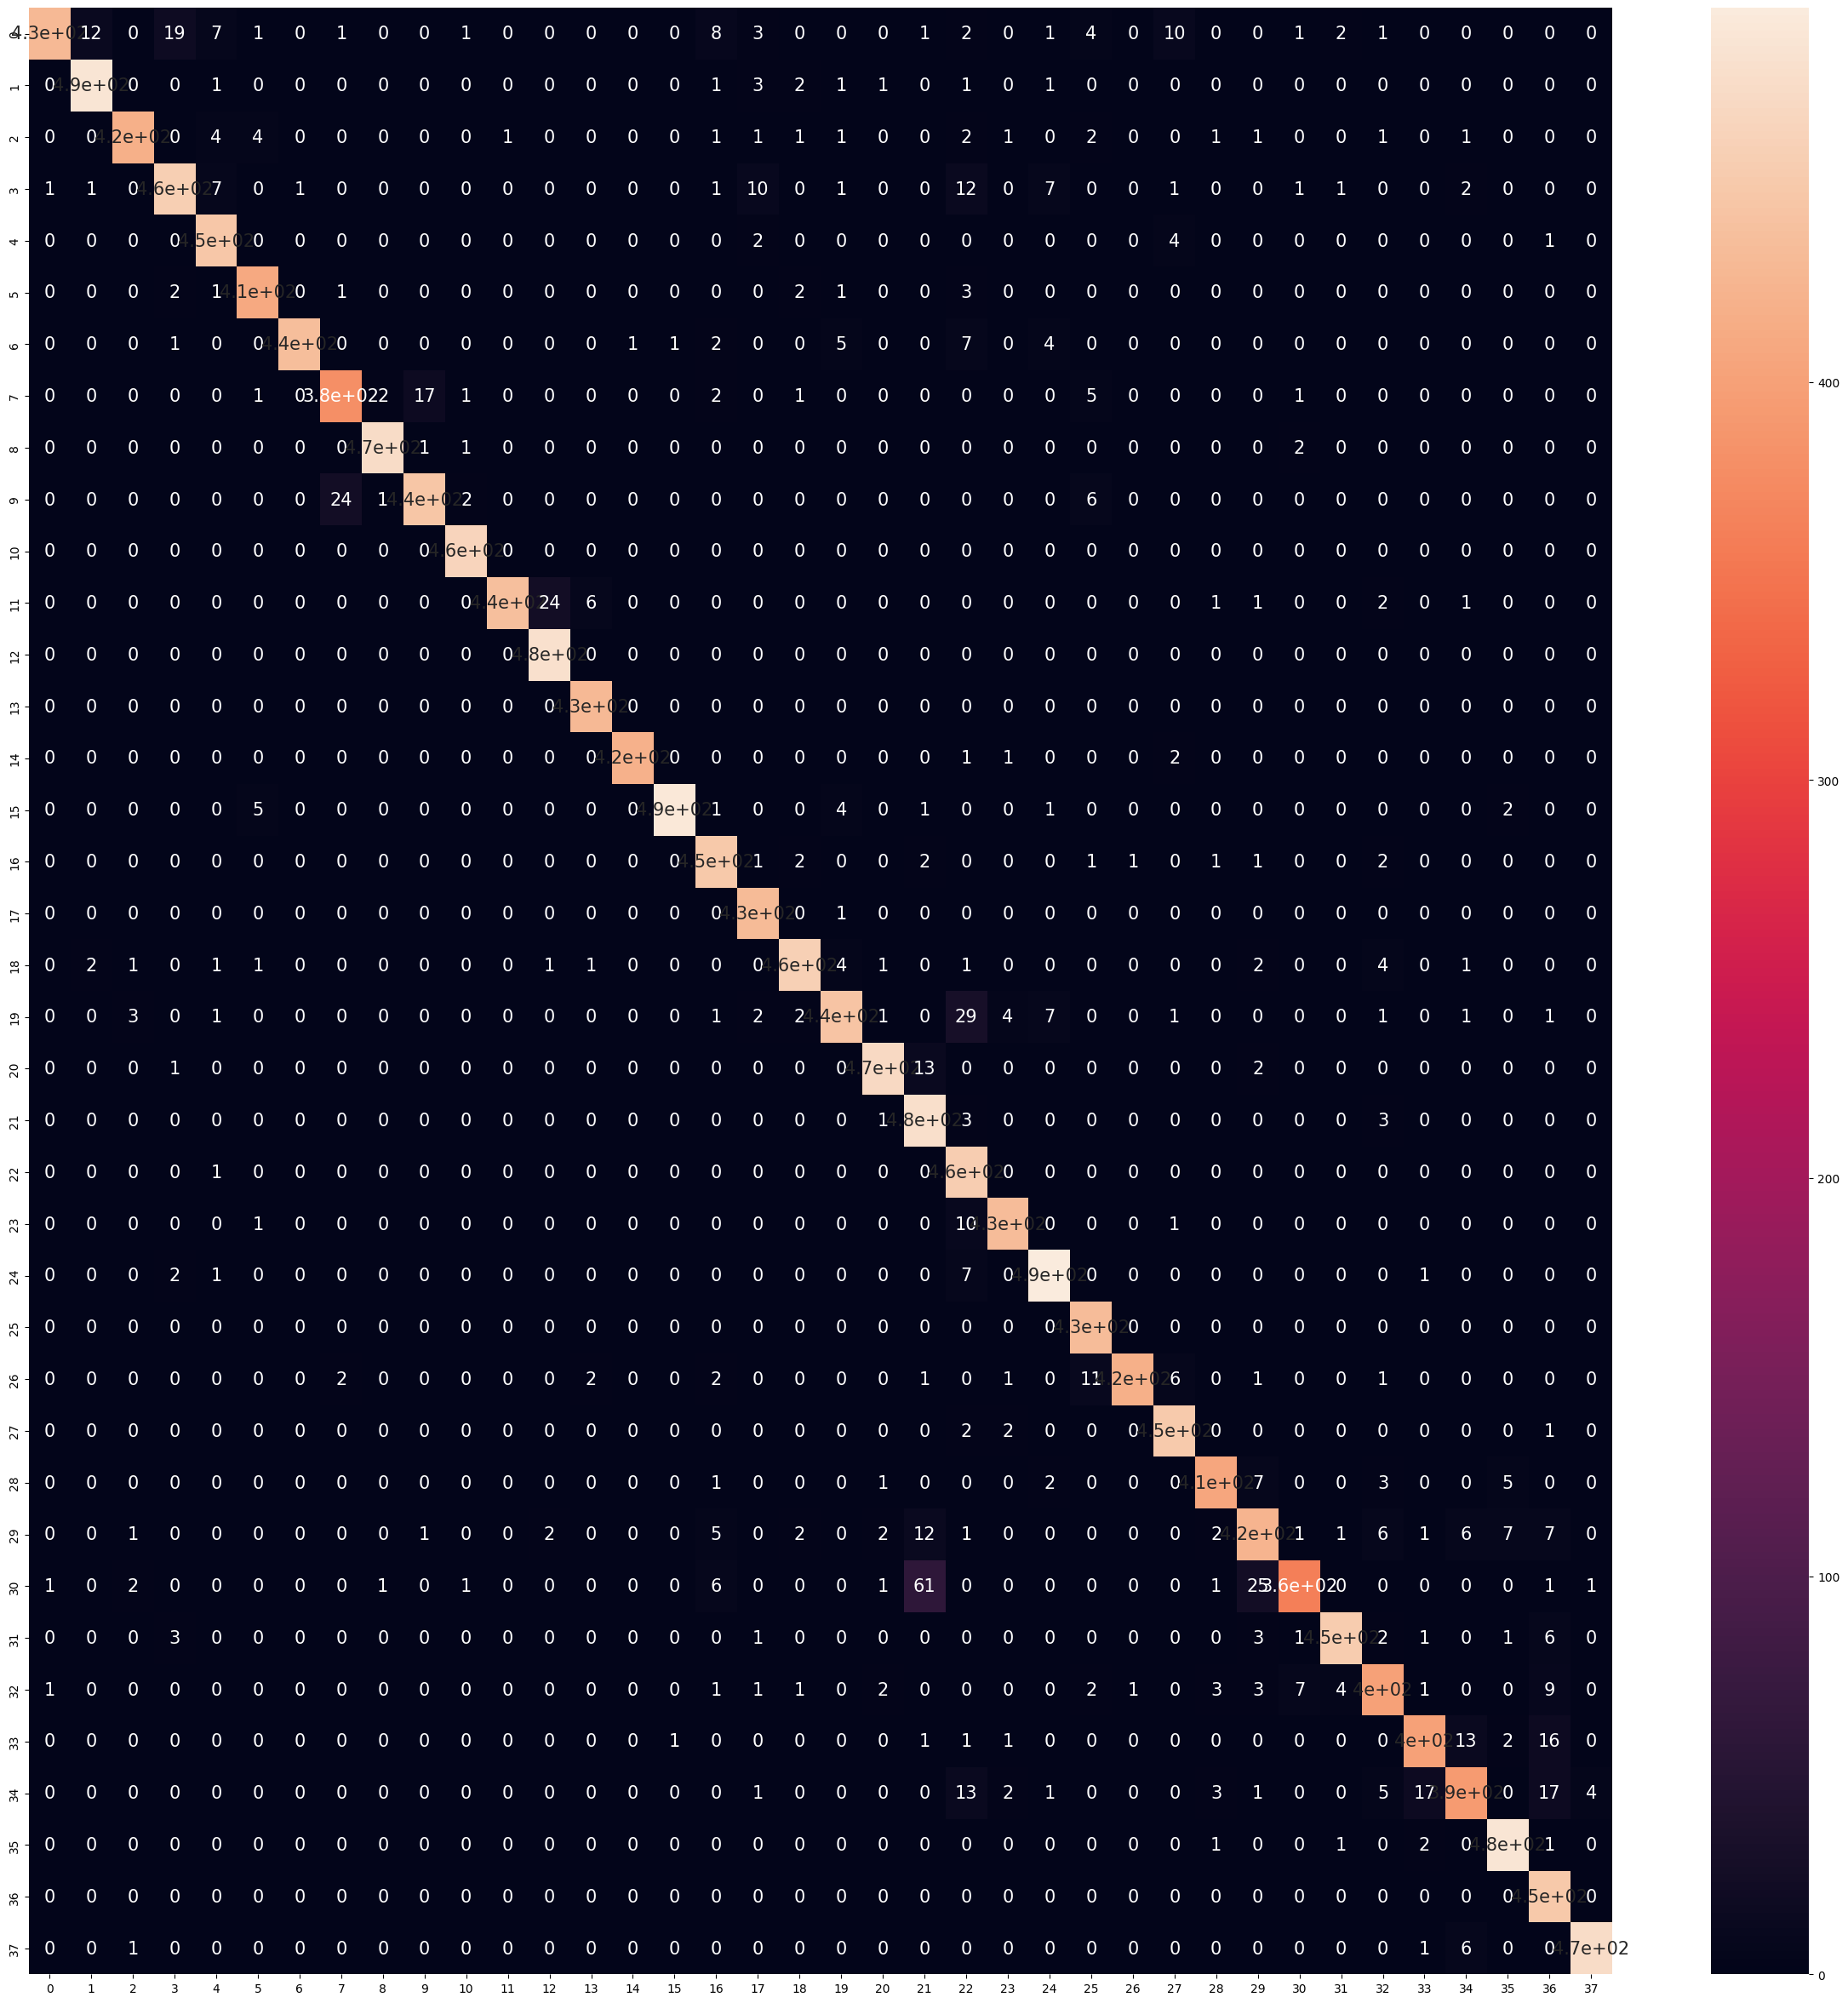

In [44]:
cnf = confusion_matrix(y_true, predicted_categories)
plt.figure(figsize=(30,30))
sns.heatmap(cnf, annot=True, annot_kws={'size':15})